Accuracy: 0.85


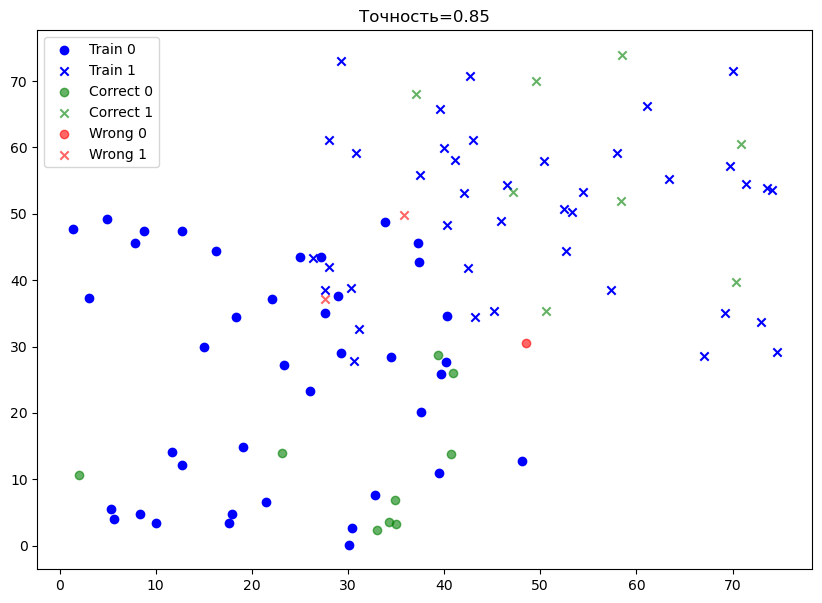

In [60]:
import random
import math
import matplotlib.pyplot as plt

xMin1, xMax1 = 0, 50  
yMin1, yMax1 = 0, 50
xMin2, xMax2 = 25, 75  
yMin2, yMax2 = 25, 75

pointsCount1 = 50
pointsCount2 = 50

x = []
y = []

for _ in range(pointsCount1):
    x.append([random.uniform(xMin1, xMax1), random.uniform(yMin1, yMax1)])
    y.append(0)

for _ in range(pointsCount2):
    x.append([random.uniform(xMin2, xMax2), random.uniform(yMin2, yMax2)])
    y.append(1)

def train_test_split(x, y, p=0.8):
    combined = list(zip(x, y))
    random.shuffle(combined)
    split_idx = int(len(combined) * p)
    train = combined[:split_idx]
    test = combined[split_idx:]
    x_train, y_train = zip(*train)
    x_test, y_test = zip(*test)
    
    return list(x_train), list(x_test), list(y_train), list(y_test)

x_train, x_test, y_train, y_test = train_test_split(x, y)

def fit(x_train, y_train, x_test, k=3):
    y_predict = []
    for test_point in x_test:
        distances = []
        for i in range(len(x_train)):
            dist = math.sqrt((test_point[0] - x_train[i][0])**2 + 
                             (test_point[1] - x_train[i][1])**2)
            distances.append( (dist, y_train[i]) )
        distances.sort(key=lambda x: x[0])
        neighbors = distances[:k]
        votes = {0: 0, 1: 0}
        for neighbor in neighbors:
            votes[neighbor[1]] += 1
        y_predict.append(0 if votes[0] > votes[1] else 1)
    return y_predict

y_predict = fit(x_train, y_train, x_test)

def compute_accuracy(y_test, y_predict):
    correct = sum(1 for i in range(len(y_test)) if y_test[i] == y_predict[i])
    return correct / len(y_test)
accuracy = compute_accuracy(y_test, y_predict)
print(f"Accuracy: {accuracy:.2f}")

def plot_results(x_train, y_train, x_test, y_test, y_predict):
    plt.figure(figsize=(10, 7))
    train_0 = [p for p, lbl in zip(x_train, y_train) if lbl == 0]
    train_1 = [p for p, lbl in zip(x_train, y_train) if lbl == 1]
    if train_0:  # Проверка на пустой список
        plt.scatter(*zip(*train_0), c='blue', marker='o', label='Train 0')
    if train_1:
        plt.scatter(*zip(*train_1), c='blue', marker='x', label='Train 1')
    correct_0 = []
    correct_1 = []
    wrong_0 = []
    wrong_1 = []
    for i in range(len(x_test)):
        point = x_test[i]
        true_lbl = y_test[i]
        pred_lbl = y_predict[i]
        if true_lbl == pred_lbl:
            if true_lbl == 0:
                correct_0.append(point)
            else:
                correct_1.append(point)
        else:
            if true_lbl == 0:
                wrong_0.append(point)
            else:
                wrong_1.append(point)
    if correct_0:
        plt.scatter(*zip(*correct_0), c='green', marker='o', alpha=0.6, label='Correct 0')
    if correct_1:
        plt.scatter(*zip(*correct_1), c='green', marker='x', alpha=0.6, label='Correct 1')
    if wrong_0:
        plt.scatter(*zip(*wrong_0), c='red', marker='o', alpha=0.6, label='Wrong 0')
    if wrong_1:
        plt.scatter(*zip(*wrong_1), c='red', marker='x', alpha=0.6, label='Wrong 1')
    plt.title(f'Точность={accuracy:.2f}')
    plt.legend()
    plt.show()
plot_results(x_train, y_train, x_test, y_test, y_predict)